##### QSpinBox、QDoubleSpinBox 數值調整元件
QSpinBox 和 QDoubleSpinBox 都是 PyQt5 裡的數值調整元件，QSpinBox 只能調整整數，QDoubleSpinBox 可以調整浮點數，\
這篇教學會介紹如何在 PyQt5 視窗裡加入 QSpinBox 數值調整元件，並實做透過數值調整元件調整數值的基本應用。

##### 加入 QSpinBox、QDoubleSpinBox 數值調整元件 
建立 PyQt5 視窗物件後，透過 QtWidgets.QSpinBox(widget) 或 QtWidgets.QDoubleSpinBox(widget) 方法，就能在指定的元件中建立數值調整元件，\
接著使用 setRange() 方法設定數值調整範圍，下方的程式碼執行後，會在視窗裡加入一個整數調整元件，以及一個浮點數調整元件。

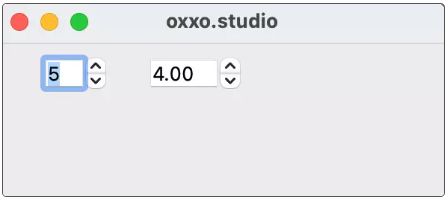

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(600, 400)

box1 = QtWidgets.QSpinBox(Form)        # 加入整數調整元件
box1.move(30,10)
box1.setRange(0,100)

box2 = QtWidgets.QDoubleSpinBox(Form)  # 加入浮點數調整元件
box2.move(100,10)
box2.setRange(0,100)

Form.show()
sys.exit(app.exec_())

##### 數值調整元件常用方法 
下方列出 QSpinBox、QDoubleSpinBox 的常用方法：

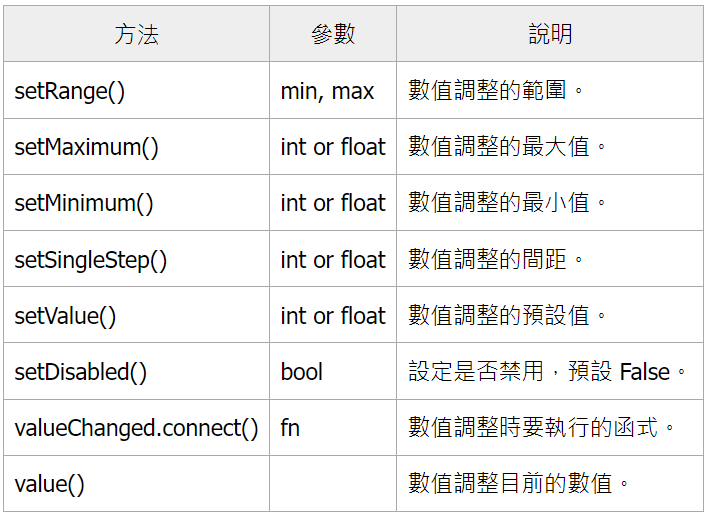

下方的程式碼執行後，會在畫面中放入兩個數值調整元件，QSpinBox 的區間為 0～100，預設值 50，調整間距為 10，\
QDoubleSpinBox 的區間為 0～100，預設值 50，調整間距為 0.2。

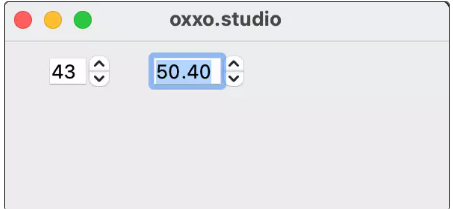

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

box1 = QtWidgets.QSpinBox(Form)
box1.move(30,10)
box1.setRange(0,100)
box1.setSingleStep(1)
box1.setValue(50)

box2 = QtWidgets.QDoubleSpinBox(Form)
box2.move(100,10)
box2.setRange(0,100)
box2.setSingleStep(0.2)
box2.setValue(50)

Form.show()
sys.exit(app.exec_())

##### 顯示數值調整內容 
運用 valueChanged.connect(fn) 方法，就能在調整數值時，執行特定的函式，下方的程式碼執行後，會透過 QLabel 顯示調整的項目數值。

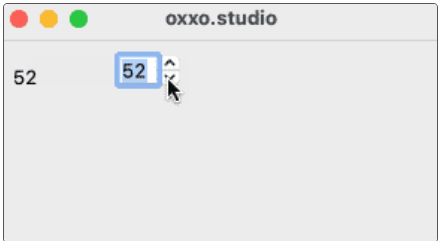

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(10,10,50,30)

def show():
    label.setText(str(box1.value()))

box1 = QtWidgets.QSpinBox(Form)
box1.move(80,10)
box1.setRange(0,100)
box1.setSingleStep(1)
box1.setValue(50)
box1.valueChanged.connect(show)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 導入 PyQt5 中的 QtWidgets 模組，用於建立圖形用戶介面。
from PyQt5 import QtWidgets
# 導入 sys 模組，這是 Python 標準庫的一部分，用於處理與 Python 直譯器及其環境的操作相關的功能。
import sys

# 定義一個名為 MyWidget 的類，繼承自 QtWidgets.QWidget，這是所有用戶介面對象的基類。
class MyWidget(QtWidgets.QWidget):
    # 初始化函數，當類被實例化時執行。
    def __init__(self):
        # super() 函數允許你調用父類的方法。這裡它調用 QWidget 的初始化函數。
        super().__init__()
        # 設置窗口標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口大小。
        self.resize(300, 200)
        # 調用 ui 方法來初始化用戶介面元件。
        self.ui()

    # 用於初始化用戶介面的方法。
    def ui(self):
        # 創建一個 QLabel 對象，父對象為當前窗口（self）。
        self.label = QtWidgets.QLabel(self)
        # 設置標籤的幾何位置和大小。
        self.label.setGeometry(10,10,50,30)
        # 創建一個 QSpinBox 對象，父對象為當前窗口（self）。
        self.box1 = QtWidgets.QSpinBox(self)
        # 設置 QSpinBox 的位置。
        self.box1.move(80,10)
        # 設置 QSpinBox 的數值範圍。
        self.box1.setRange(0,100)
        # 設置 QSpinBox 的單步長。
        self.box1.setSingleStep(1)
        # 設置 QSpinBox 的初始值。
        self.box1.setValue(50)
        # 連接 QSpinBox 的值改變信號到 showMsg 方法。
        self.box1.valueChanged.connect(self.showMsg)

    # 當 QSpinBox 的值改變時調用的方法。
    def showMsg(self):
        # 更新標籤的文本為 QSpinBox 的當前值。
        self.label.setText(str(self.box1.value()))

# 檢查這是不是主程式入口。
if __name__ == '__main__':
    # 創建一個 QApplication 應用實例。
    app = QtWidgets.QApplication(sys.argv)
    # 創建 MyWidget 類的一個實例。
    Form = MyWidget()
    # 顯示窗口。
    Form.show()
    # 啟動應用的事件循環，並在退出時返回狀態碼。
    sys.exit(app.exec_())